In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 

In [2]:
d1=pd.read_csv('Store.csv')

d1.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Metro', 'Store_Area',
       'Items_Available', 'Parking', 'Coupon_Category', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [3]:
d1=d1.drop('Observation',axis=1)

In [4]:
d1.isnull().sum()

Dist_Taxi               13
Dist_Market             13
Dist_Metro               1
Store_Area               8
Items_Available         15
Parking                  0
Coupon_Category          0
Daily_Customer_Count     0
Store_Sales              0
dtype: int64

In [5]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dist_Taxi,919.0,8229.727965,2561.985008,146.0,6476.0,8230.0,9937.0,20662.0
Dist_Market,919.0,11018.752992,2543.920590,1666.0,9354.5,11161.0,12670.5,20945.0
Dist_Metro,931.0,13072.092374,2586.456161,3227.0,11301.5,13163.0,14817.0,23294.0
Store_Area,924.0,1511.862554,790.969660,775.0,1318.0,1480.5,1655.0,24300.0
Items_Available,917.0,1794.924755,468.159457,932.0,1583.0,1774.0,1982.0,12730.0
Daily_Customer_Count,932.0,785.579399,265.546853,-110.0,600.0,780.0,970.0,1560.0
Store_Sales,932.0,60846.952790,50253.639022,300.0,46580.0,58660.0,71872.5,1500000.0


In [6]:
d1.mean()

Dist_Taxi                8229.727965
Dist_Market             11018.752992
Dist_Metro              13072.092374
Store_Area               1511.862554
Items_Available          1794.924755
Daily_Customer_Count      785.579399
Store_Sales             60846.952790
dtype: float64

In [7]:
d1.fillna(d1.median(),inplace=True)

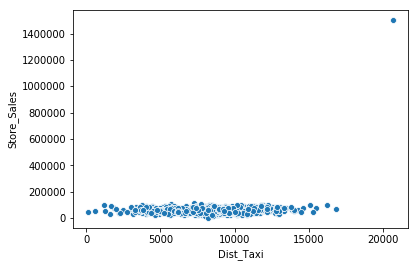

In [8]:
sns.scatterplot(x=d1.Dist_Taxi,y='Store_Sales',data=d1)

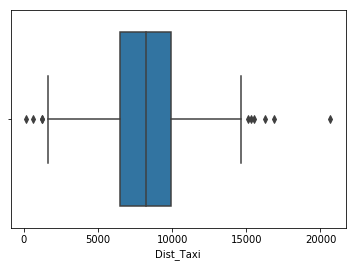

In [9]:
sns.boxplot(x=d1.Dist_Taxi,data=d1)

In [10]:
d1.Dist_Taxi.max()

20662.0

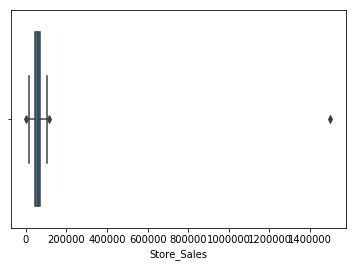

In [11]:
sns.boxplot(x=d1.Store_Sales,data=d1)

In [12]:
d1.Store_Sales.max()

1500000

In [13]:
d1[d1.Store_Sales==1500000]   #outlier in the data but seems to be important data as the person may be village wholesaler

,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
360,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,1500000


In [14]:
##let us perform anova test


d1['Coupon_Category'].unique()

array(['CAT B', 'CAT A', 'CAT C'], dtype=object)

In [15]:
npB=np.array(d1.Daily_Customer_Count[d1.Coupon_Category=='CAT B'])



npA=np.array(d1.Daily_Customer_Count[d1.Coupon_Category=='CAT A'])

npC=np.array(d1.Daily_Customer_Count[d1.Coupon_Category=='CAT C'])

In [16]:
t_statistic, p_value  =  stats.ttest_ind(npB,npA)
print('P Value %1.3f' % p_value)  

P Value 0.511


In [17]:
t_statistic, p_value  =  stats.ttest_ind(npC,npA)
print('P Value %1.3f' % p_value)  

P Value 0.364


In [18]:
mod = ols('Store_Sales~Daily_Customer_Count', data = d1).fit()
aov_table = sm.stats.anova_lm(mod, typ=3)
print(aov_table)

                            sum_sq     df           F        PR(>F)
Intercept             2.807297e+11    1.0  111.262663  1.197869e-24
Daily_Customer_Count  4.666729e+09    1.0    1.849582  1.741616e-01
Residual              2.346507e+12  930.0         NaN           NaN


In [21]:
df1=pd.DataFrame(npA)

df2=pd.DataFrame(npB)

df3=pd.DataFrame(npC)

In [23]:
mod = ols('df1~df2').fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

TypeError: from_formula() missing 1 required positional argument: 'data'

In [33]:

1
2#dependent ttest  paired
3
from scipy.stats import ttest_rel

stat, p = ttest_rel(npA, npB)

ValueError: unequal length arrays

In [ ]:
unpaired ttest

from scipy.stats import ttest_ind
data1, data2 = ...
stat, p = ttest_ind(data1, data2)

In [62]:
#chi square test

	
from scipy.stats import chi2_contingency
table = ...
stat, p, dof, expected = chi2_contingency(table)

SyntaxError: unexpected EOF while parsing (<ipython-input-62-997bb731cede>, line 6)

In [31]:
	#Observations in each sample are independent and identically distributed (iid)
from scipy.stats import normaltest

stat, p = normaltest(d1.Store_Sales)

p

0.0

In [28]:
#shapiro test to check the normality


	
from scipy.stats import shapiro

stat, p = shapiro(d1.Store_Sales)


stat

0.19921284914016724